## Aim ##

In this project we will be diving into the world of automobiles(cars) with the aim of creating a model that can optimally predict the price of a particular car. We will we analysing various metrics that are ideally used to measure a cars performance and based on those metrics, we will build a model that endures the lowest error when used against novel data.

we will be using the data put together by Jeffrey C. Schlimmer from UCI for the project.


In [1]:
## Importing the required libraries ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

Enter Password········
Password incorrect


Lets read our dataset into a pandas dataframe. the columns in the dataset do not match the data that is represented 
. Inorder to fix this, we will manually create a list of columns for the dataset.

In [2]:
## Reading the data ##

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']



cars = pd.read_csv('/Users/arjun/Downloads/imports-85.data', names=cols)



In [3]:
## getting a sense of the data ##
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Now we'd want our dataset to contain only essential data i.e data that can be using in training the model. Inorder to disregard all the clutter and only include relevent data, we will create another dataframe from our cars dataframe. This new dataframe would only contain continous data.

In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_values_cols]

In [5]:
## getting a sense of our new data ##
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,?


Right away we can see ``?`` in the Normalize-losses columns. Remember that our goal is to eradicate all the clutter from our dataset to achieve optimal results.

In the next couple of steps we will be cleaning our data

In [6]:
## replacing the ? datapoints in all columns with NAN value ##

numeric_cars = numeric_cars.replace('?',np.nan)

In [7]:
## converting all the data to floating numbers ##
numeric_cars = numeric_cars.astype(float)

Now lets determine how many null values exist in out dataset

In [8]:
numeric_cars['normalized-losses'].isnull().sum()

41

We can take two approaches with null data
1. Drop all the null datapoints
2. Replace the null values with a suitable metric

Since the number of null data values is high (41 out of 205). we cant just drop the values which leaves us with the second approach. We will replace all the null data with the mean value.

In [9]:
numeric_cars = numeric_cars.replace(np.nan,numeric_cars['normalized-losses'].mean())

In [10]:
numeric_cars['normalized-losses'].isnull().sum()

0

Lets check the null value count of all the columns in our dataset

In [11]:
for col in continuous_values_cols:
    print(f"{col}:{numeric_cars[col].isnull().sum()}")

normalized-losses:0
wheel-base:0
length:0
width:0
height:0
curb-weight:0
engine-size:0
bore:0
stroke:0
compression-rate:0
horsepower:0
peak-rpm:0
city-mpg:0
highway-mpg:0
price:0


Our data is almost ready to be trained but thats just one caveat to deal with. For us to train our data against machine learning models, our data has to be normalized to range between 0 to 1. Since our target value is the ``Price`` of a car, we will normalize all the values but the ``Price`` column. ``Price`` will retain its original data.

lets take care of that

In [12]:
price_col = numeric_cars['price']

numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())

numeric_cars['price'] = price_col

After 14 steps our data is finally ready to be trained. Before jumping into our regorous training session, lets get a sense of our now cleaned data

In [13]:
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.007785,0.005086,0.12500,0.262500,0.753010,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.007785,0.005086,0.12500,0.262500,0.753010,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.001172,0.011673,0.12500,0.441667,0.753010,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.005441,0.011090,0.18750,0.225000,0.830195,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.005441,0.011090,0.06250,0.279167,0.830195,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.500000,0.441667,0.395268,0.283019,0.005441,0.011090,0.09375,0.258333,0.830195,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.925000,0.658333,0.525989,0.283019,0.005441,0.011090,0.09375,0.258333,0.830195,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.925000,0.658333,0.568658,0.283019,0.005441,0.011090,0.09375,0.258333,0.830195,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.925000,0.675000,0.619860,0.264151,0.004939,0.011090,0.08125,0.383333,0.830195,0.111111,0.105263,23875.0
9,0.298429,0.376093,0.553731,0.633333,0.350000,0.607060,0.264151,0.004939,0.011090,0.00000,0.466667,0.830195,0.083333,0.157895,122.0


In [14]:
numeric_cars.shape

(205, 15)

In [15]:
numeric_cars.describe()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.298429,0.354419,0.491780,0.467317,0.493740,0.414106,0.248707,0.025994,0.029204,0.196409,0.235122,0.764828,0.339431,0.388190,12951.809756
std,0.165869,0.175562,0.184139,0.178767,0.203627,0.201971,0.157142,0.137757,0.137310,0.248253,0.164824,0.105891,0.181726,0.181222,8075.225842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000
25%,0.188482,0.230321,0.376119,0.316667,0.350000,0.254849,0.135849,0.005106,0.008672,0.100000,0.091667,0.722136,0.166667,0.236842,7689.000000
50%,0.298429,0.303207,0.479104,0.433333,0.525000,0.359193,0.222642,0.006446,0.010173,0.125000,0.195833,0.783884,0.305556,0.368421,10198.000000
75%,0.376963,0.460641,0.626866,0.550000,0.641667,0.561288,0.301887,0.008873,0.011173,0.150000,0.300000,0.830195,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


As expected our data looks prestine and ready to be trained.

## Model Training Commenses ##

### Univariate Model ###

We will now code a  Univariate(only one feature) model using K nearest model algorithm that takes the trainingdata(training_feature),testing data(price),the dataframe(numeric_cars) as parameter and outputs the root mean square error(RMSE). Lower RMSE is always better.



In [16]:
## Univariate KNN model ##
def train_test(train_col,target_col,df):

### Creating the instance of KNeighborsRegressor Class with default n_neighbor value of 5 ###

    knn = KNeighborsRegressor()

    np.random.seed
    
    ## Randomizing the order of row in the DF
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    ## Dividing the number of data point in half
    
    total_data_point = int(len(random_df) / 2)
    
    train_df = random_df.iloc[0:total_data_point]
    test_df = random_df.iloc[total_data_point:]
    
    knn.fit(train_df[[train_col]],train_df[target_col])
    predicted_labels = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col],predicted_labels)
    rmse = np.sqrt(mse)
    
    return rmse


rmse_scores = {}

train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse = train_test(col,'price',numeric_cars)
    rmse_scores[col] = rmse
    
rmse_results = pd.Series(rmse_scores)
rmse_results.sort_values()

engine-size          4131.400533
highway-mpg          4769.812138
curb-weight          5121.938409
wheel-base           5317.635015
city-mpg             5369.784269
horsepower           5701.898390
width                5723.780607
length               6062.284103
compression-rate     6943.270669
bore                 7433.942998
normalized-losses    7643.120724
peak-rpm             7811.038155
height               8388.816267
stroke               8570.340347
dtype: float64

Based on the models predictions the highway-mpg feature has the lowest RMSE. But we have only used one value for n_neighbors i.e 5. Lets use different different values for n_neighbors and observe how our model performs

In [17]:
def knn_multiple_neighbors(train_col,target_col,df,k):
    knn = KNeighborsRegressor()
    
    np.random.seed
    
    ## Randomizing the order of row in the DF
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    ## Dividing the number of data point in half
    
    total_data_point = int(len(random_df) / 2)
    
    train_df = random_df.iloc[0:total_data_point]
    test_df = random_df.iloc[total_data_point:]
    rmse_k = {}
    
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i)
        
        knn.fit(train_df[[train_col]],train_df[target_col])
        predicted_labels = knn.predict(test_df[[train_col]])
    
        mse = mean_squared_error(test_df[target_col],predicted_labels)
        rmse = np.sqrt(mse)
        
        rmse_k[i] = rmse
        
    
    return rmse_k

rmse_scores_n_neighbors = {}
for col in train_cols:
    rmse_for_n = knn_multiple_neighbors(col,'price',numeric_cars,[1,3,5,7,9])
    rmse_scores_n_neighbors[col] = rmse_for_n

    
rmse_neighbors_series = pd.Series(rmse_scores_n_neighbors)

rmse_scores_n_neighbors


{'normalized-losses': {1: 10766.593231637107,
  3: 7377.317574676229,
  5: 8156.5777362194185,
  7: 7838.101013745879,
  9: 7823.03204582645},
 'wheel-base': {1: 4930.788181151026,
  3: 4759.107725966819,
  5: 4965.433612485419,
  7: 5066.400987478227,
  9: 5238.700103134948},
 'length': {1: 6428.68346152956,
  3: 6047.481104989942,
  5: 5903.009228178554,
  7: 5959.161256811563,
  9: 5844.700083662221},
 'width': {1: 6233.870103396398,
  3: 4660.664515726844,
  5: 4636.282591846221,
  7: 4625.721650209721,
  9: 4743.828994374447},
 'height': {1: 10396.036428715728,
  3: 8137.23770682061,
  5: 8358.811332598707,
  7: 8163.064343730793,
  9: 8253.42481927309},
 'curb-weight': {1: 7747.438256849119,
  3: 5121.598259784521,
  5: 4498.856320772142,
  7: 4202.060499381188,
  9: 4404.046786187663},
 'engine-size': {1: 4489.378736183126,
  3: 3746.7947157344297,
  5: 3822.49125378237,
  7: 4206.388096326935,
  9: 4020.0512827367806},
 'bore': {1: 8286.085361698806,
  3: 6739.161831324502,
  5

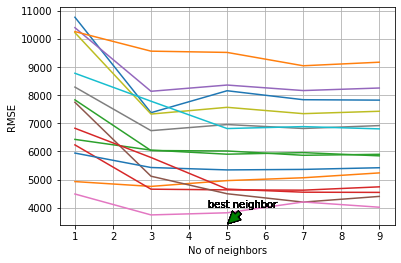

In [41]:
for feature,neighbor in rmse_scores_n_neighbors.items():
    x = list(neighbor.keys())
    y = list(neighbor.values())
    
    plt.plot(x,y)
    plt.xlabel('No of neighbors')
    plt.ylabel('RMSE')
    plt.annotate('best neighbor',xy=(5,3407),xytext=(4.5,4000),arrowprops = dict(facecolor ='green', 
                                  shrink = 0.05))
    plt.grid(True)

By the looks of the plot, choosing a n_neighbors value of 5 seems to be optimal for the univariate model. But we have only trained the model to include one feature with is extremely limited. The model would not generalize well.
Lets now build a multivariate model(many features)

## Multivariate Model ##
Lets build a model that accepts a list of columns to train as opposed to just one column in the previous step. After Building the Model we will test it against the 2,3,4,5 best features(lowest avg rmse) from the previous models output

In [19]:
avg_rmse_for_feature = {}

## Calculating average rmse accross all parameter for every feature ##

for k,v in rmse_scores_n_neighbors.items():
    avg_rmse = np.mean(list(v.values()))
    avg_rmse_for_feature[k] = avg_rmse
    
series_avg_rmse = pd.Series(avg_rmse_for_feature)

sorted_series_avg_rmse = series_avg_rmse.sort_values()

sorted_feature = sorted_series_avg_rmse.index

## Index of the Sorted avg rmses for each feature ##
sorted_feature

Index(['engine-size', 'width', 'wheel-base', 'curb-weight', 'highway-mpg',
       'horsepower', 'length', 'city-mpg', 'bore', 'compression-rate',
       'stroke', 'normalized-losses', 'height', 'peak-rpm'],
      dtype='object')

In [20]:
def train_test_multi_features(train_cols,target_col,df):

    """Building a multivariate KNN model that takes a list of columns against a teaget columns(price in our case) and
       outputs the rmse value for 2,3,4,5,6 best features from the previous step
    """

    np.random.seed
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    total_data_point = int(len(random_df) / 2)
    
    train_df = random_df.iloc[0:total_data_point]
    test_df = random_df.iloc[total_data_point:]
    
    k_value = [5]
    rmse_multi = {}
    
    
    for i in k_value:
        knn = KNeighborsRegressor(n_neighbors=i)
        
        knn.fit(train_df[train_cols],train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
    
        mse = mean_squared_error(test_df[target_col],predicted_labels)
        rmse = np.sqrt(mse)
        
        rmse_multi[i] = rmse
        
    
    return rmse_multi

rmse_feature_results = {}

for n_best_feats in range(2,7):
    rmse_feature_results['{} best features'.format(n_best_feats)] = train_test_multi_features(
    sorted_feature[:n_best_feats],'price',numeric_cars)

rmse_feature_results

{'2 best features': {5: 5426.339227154467},
 '3 best features': {5: 4754.462333021106},
 '4 best features': {5: 3876.6025379052217},
 '5 best features': {5: 5439.335593243197},
 '6 best features': {5: 3545.406275923709}}

2 best features [5426.339227154467]
3 best features [4754.462333021106]
4 best features [3876.6025379052217]
5 best features [5439.335593243197]
6 best features [3545.406275923709]


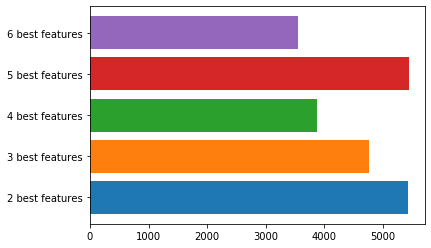

In [21]:
for feature,value in rmse_feature_results.items():
    x = feature
    y = list(value.values())
    print(x,y)
    plt.barh(x,y)


On the basis of the above plot generated, the optimal number of feature one should use is 6 since 6 has the least average RMSE.



## Hyperparameterization ##

In simple terms huperparametarization is the process of varying the parameter(n_neighbors) between a given range to observe the difference in output(rmse) for different Parameter value. In the next few steps we will be Hyperparameterizing from 1 to 25 for the top three models in the previous step.

In [34]:
def train_test_parameter(train_cols,target_col,df):

    np.random.seed
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    total_data_point = int(len(random_df) / 2)
    
    train_df = random_df.iloc[0:total_data_point]
    test_df = random_df.iloc[total_data_point:]
    
    k_value = [i for i in range(1,25)]
    rmse_parameter = {}
    
    
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        knn.fit(train_df[train_cols],train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
    
        mse = mean_squared_error(test_df[target_col],predicted_labels)
        rmse = np.sqrt(mse)
        
        rmse_parameter[k] = rmse
        
    
    return rmse_parameter

parameter_rmse_results = {}


for feature in range(2,7):
    parameter_rmse_results['{} best features'.format(feature)] = train_test_parameter(
        sorted_feature[:feature],
        'price',
        numeric_cars
    )

parameter_rmse_results

{'2 best features': {1: 4906.882980316962,
  2: 4766.314598761703,
  3: 5013.377584713124,
  4: 5057.241563220224,
  5: 5115.812768612154,
  6: 5050.230092886891,
  7: 5090.2188367907775,
  8: 5139.0416053935605,
  9: 5285.9818081087105,
  10: 5494.6159096485635,
  11: 5549.4639962930305,
  12: 5643.361934528306,
  13: 5722.46548303399,
  14: 5686.623834820252,
  15: 5678.982258696066,
  16: 5615.382828860532,
  17: 5645.557742976396,
  18: 5687.4710862777665,
  19: 5745.607651232637,
  20: 5778.000897932159,
  21: 5822.6978072006505,
  22: 5866.944234815696,
  23: 5926.162707661879,
  24: 5989.094840931288},
 '3 best features': {1: 3209.682935071519,
  2: 3928.2805806597303,
  3: 4083.70662001573,
  4: 4296.083175108631,
  5: 4385.349957672948,
  6: 4755.702600554317,
  7: 4848.114238168944,
  8: 5091.254651172792,
  9: 5226.976055683003,
  10: 5325.313297096521,
  11: 5471.87987195864,
  12: 5554.9807049119845,
  13: 5555.559411559401,
  14: 5553.192181693863,
  15: 5617.044671593354

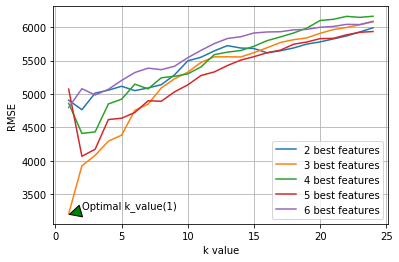

In [40]:
for k,v in parameter_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y,label = '{}'.format(k))
    
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()


plt.annotate('Optimal k_value(1)',xy=(1,3200),xytext=(2,3300),arrowprops = dict(facecolor ='green', 
                                  shrink = 0.05))
plt.grid(True)




#### Conclusions we can positively make from the above plot are : ####

1. Using 1 parameter(n_neighbor) is optimal
2. Using 3 features gives the lease rmse value.

So Far we split the dataset in 2 parts.
1. Train data
2. Test Data
With a 75:25 split

### K-Fold cross validation ##

We will now split our data using a method called K fold cross validation. Here's how it's gonna work

1. splitting the full dataset into k equal length partitions.
2. selecting k-1 partitions as the training set
3. selecting the remaining partition as the test set
4. Using the model to predict on the test fold
5. calculating the error(RMSE)
6. Repeating the above steps until all the k-1 partitions are used as test fold once

Lets build our model now




In [66]:
def train_test_kfold(train_cols,target_col,df,folds):

    np.random.seed
    
    
    
    rmse_fold = {}
    
    
    for k in folds:
        kf = KFold(k,shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        
        mses = cross_val_score(knn,df[train_cols],df[target_col],scoring='neg_mean_squared_error',cv=kf)
        rmses = np.sqrt(np.abs(mses))
        avg_rmses = np.mean(rmses)
        
        rmse_fold[k] = avg_rmses
        
    
    return rmse_fold



In [72]:
k_fold_dict = {}

for key,value in train_test_kfold(sorted_feature,'price',numeric_cars,[2,3,4,5,6,7,8,9]).items():
    k_fold_dict[key] = value
    print(str(key), 'folds', 'avg rmse value is ', value)
    

2 folds avg rmse value is  4545.363840427154
3 folds avg rmse value is  4129.9036662307435
4 folds avg rmse value is  4146.535506065259
5 folds avg rmse value is  4093.753903802364
6 folds avg rmse value is  4106.3263255335505
7 folds avg rmse value is  3936.6624207819305
8 folds avg rmse value is  3991.672612061985
9 folds avg rmse value is  3989.5130938174243


Text(7.5, 4150, 'Optimum folds')

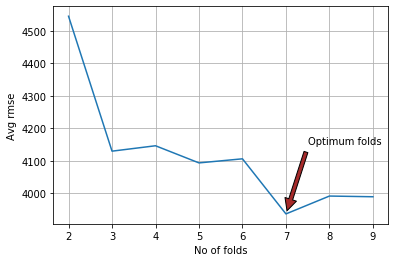

In [85]:
sorted_fold_lists = sorted(k_fold_dict.items())
x,y = zip(*sorted_fold_lists)

plt.xlabel('No of folds')
plt.ylabel('Avg rmse')
plt.grid(True)
plt.plot(x,y)
plt.annotate('Optimum folds',xy=(7,3936),xytext=(7.5,4150),arrowprops = dict(facecolor ='brown', 
                                  shrink = 0.05))

From the plot above, we can safely assume 7 to be be the optimum number of folds so we will consider 7 as the optimum number of folds

We will model build a model for different parameter with 7 folds

In [86]:
def train_test_multi_parameter(train_cols,target_col,df):

    np.random.seed
    
    
    
    rmse_para = {}
    n_para = [i for i in range(1,10)]
    
    for k in n_para:
        kf = KFold(n_splits=7,shuffle=True, random_state=1)
        knn = KNeighborsRegressor(n_neighbors=k)
        
        mses = cross_val_score(knn,df[train_cols],df[target_col],scoring='neg_mean_squared_error',cv=kf)
        rmses = np.sqrt(np.abs(mses))
        avg_rmses = np.mean(rmses)
        
        rmse_para[k] = avg_rmses
        
    
    return rmse_para




In [87]:
rmse_multi_parameter = {}

for key,value in train_test_multi_parameter(sorted_feature,'price',numeric_cars).items():
    rmse_multi_parameter[key] = value
    print(str(key), 'parameters', 'avg rmse value is ', value)

1 parameters avg rmse value is  3044.5391389275746
2 parameters avg rmse value is  3561.7501218990715
3 parameters avg rmse value is  3716.586909430792
4 parameters avg rmse value is  3838.599120438049
5 parameters avg rmse value is  3936.6624207819305
6 parameters avg rmse value is  4011.9748052395435
7 parameters avg rmse value is  4205.288086648822
8 parameters avg rmse value is  4277.812802219607
9 parameters avg rmse value is  4379.047764759862


Text(2, 3100, 'Optimum parameter')

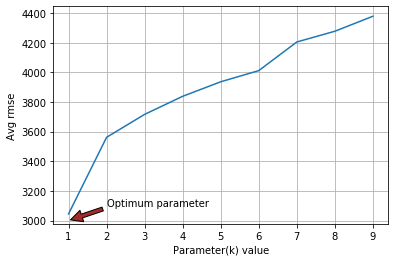

In [90]:
sorted_k_list = sorted(rmse_multi_parameter.items())

u,v = zip(*sorted_k_list)

plt.xlabel('Parameter(k) value')
plt.ylabel('Avg rmse')
plt.grid(True)
plt.plot(u,v)
plt.annotate('Optimum parameter',xy=(1,3000),xytext=(2,3100),arrowprops = dict(facecolor ='brown', 
                                  shrink = 0.05))


#### The conclusions that could be made so far are: ####

1. Optimum number of parameters is 1.
2. Optimum number of Kfolds is 7.



In [92]:
def train_test_best_features(train_cols,target_col,df):

    np.random.seed
    
    
    
    top_feat_rmse = {}
    n_features = [i for i in range(1,14)]
    
    
    for feat in n_features:
        kf = KFold(n_splits=7,shuffle=True, random_state=1)
        knn = KNeighborsRegressor(n_neighbors=1)
        
        mses = cross_val_score(knn,df[train_cols[:feat]],df[target_col],scoring='neg_mean_squared_error',cv=kf)
        rmses = np.sqrt(np.abs(mses))
        avg_rmses = np.mean(rmses)
        
        top_feat_rmse[feat] = avg_rmses
        
    
    return top_feat_rmse

In [94]:
top_feature_rmse = {}


for key,value in train_test_best_features(sorted_feature,'price',numeric_cars).items():
    top_feature_rmse[key] = value
    print(str(key), 'best features', 'avg rmse value is ', value)

1 best features avg rmse value is  5035.712170671001
2 best features avg rmse value is  3922.2398447597548
3 best features avg rmse value is  3478.033848833863
4 best features avg rmse value is  3417.742265269603
5 best features avg rmse value is  3376.8895787140164
6 best features avg rmse value is  2987.7339294315566
7 best features avg rmse value is  3417.7204835181474
8 best features avg rmse value is  3160.9505447622946
9 best features avg rmse value is  3163.7438339273567
10 best features avg rmse value is  3361.704315604282
11 best features avg rmse value is  3361.704315604282
12 best features avg rmse value is  3954.094673899485
13 best features avg rmse value is  3077.082267434375


Text(7, 3050, 'Optimum features')

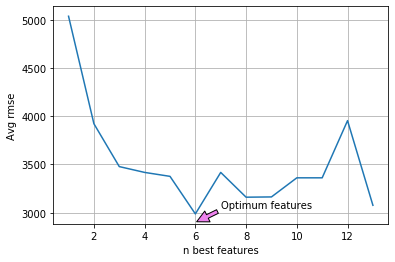

In [102]:
sorted_feat_list = sorted(top_feature_rmse.items())

a,b = zip(*sorted_feat_list)

plt.xlabel('n best features')
plt.ylabel('Avg rmse')
plt.grid(True)
plt.plot(a,b)
plt.annotate('Optimum features',xy=(6,2900),xytext=(7,3050),arrowprops = dict(facecolor ='violet', 
                                  shrink = 0.05))





The Analysis suggests that the optimum number of features to include is 6.

#### Finally an amalgamation of all the ideal values to be considered while predicting the price of a car using KNN model with Kfold cross validation is  ####
```6 Features, 1 neighbor, 7 folds```.

Suprisingly the values with traditional split and kfold cross validation are similar. we'd expect better results with the kfold cross validation but the result has not changed.


